### Lab Machine learning
#### Souaybou bagayoko 303189, Semmester:2, groupe:2
#### Tutorial 1
#### 1.1 Python and Numpy 

## Task1 description:
This task puts you in the position that I end up at the end of every semester.  Which is, grading your work and issuing the grades.  In this task you are required to use the‘Grades.csv’ File that has been provided on learnweb. Grading Program:
1. Read the data from the csv.
- For each student, Compute the sum for all subjects for each student.
- Compute the average of the point for each student.  (total points are 500)
- Compute the standard deviation of point for each student.
- Plot the average points for all the students (in one figure)
- For each student assign a grade based on the following rubric.
- Plot the histogram of the final grades.

In [1]:
import pandas as pd 
data = pd.read_csv('Grades.csv') # reading the file 
data.info() # I do a quick look at the data structure and type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   First Name   30 non-null     object 
 1   Last Name    30 non-null     object 
 2   English      30 non-null     float64
 3    Maths       30 non-null     float64
 4   Science      30 non-null     float64
 5   German       30 non-null     float64
 6   Sports       30 non-null     float64
 7   Final Grade  30 non-null     float64
dtypes: float64(6), object(2)
memory usage: 2.0+ KB


#### Compute the sum for all subjects for each student.


In [2]:
#### the summe fro all subjects in already in the data set.
#### let's asume it wasn't there 
data['sum'] = data.drop('Final Grade', axis=1).sum(axis=1) # this sum the column except the Final Grade
data.head()

,First Name,Last Name,English,Maths,Science,German,Sports,Final Grade,sum
0,Robyn,Hobgood,60.95,24.77,20.60,69.32,8.36,184.00,184.00
1,Eddy,Swearngin,100.00,12.99,100.00,52.24,100.00,365.23,365.23
2,Leoma,Bridgman,83.37,100.00,78.69,100.00,19.50,381.56,381.56
3,Arnetta,Peart,87.75,100.00,86.93,87.90,41.73,404.31,404.31
4,Maryland,Colby,100.00,100.00,100.00,18.87,88.72,407.59,407.59


#### Compute the average of the point for each student. (total points are 500).

In [3]:
# let's drop the column 'sum' first 
data = data.drop('sum',axis =1)
# the column average will contain the averge grade
# the Average = (Final Grade /500)*100= Final Grade /5
data['Average'] = data['Final Grade']/5
data.head()

,First Name,Last Name,English,Maths,Science,German,Sports,Final Grade,Average
0,Robyn,Hobgood,60.95,24.77,20.60,69.32,8.36,184.00,36.800
1,Eddy,Swearngin,100.00,12.99,100.00,52.24,100.00,365.23,73.046
2,Leoma,Bridgman,83.37,100.00,78.69,100.00,19.50,381.56,76.312
3,Arnetta,Peart,87.75,100.00,86.93,87.90,41.73,404.31,80.862
4,Maryland,Colby,100.00,100.00,100.00,18.87,88.72,407.59,81.518


#### Compute the standard deviation of point for each student.

In [4]:
import numpy as np 
def Stand_dev(M):
    "this return the standart deviation for a matrix"
    return np.sqrt(np.array([sum((x-x.mean())**2)/len(x) for x in M]))
# I put the value into a numpy array matrix 
# I select the columns containing the classes and leave out the rest
# the order doesn't change when we instantiate into numpy array 
std_data = data.drop(['First Name', 'Last Name', 'Final Grade', 'Average' ], axis=1).values
std_data[0] # check in the firs row correspond to the same row in the dataframe


array([60.95, 24.77, 20.6 , 69.32,  8.36])

In [5]:
StD = Stand_dev(std_data) # calculate the standart deviation for each row
data['Standart Deviation'] = StD
print(StD)
data.head()

[23.90300149 35.26802268 29.68270971 20.15626493 31.6271835  56.32399297
 28.84235663 28.44043811  6.55028671 30.02816172 33.43303396 32.38191322
 12.26805347 19.91542257 27.9986714  25.55033745 39.02773557 15.31637503
 35.6792001  36.02750305 14.91715844 53.3024542  17.96       23.824
 45.44430173 23.33787274 30.27035381 16.42973086 28.47107557 21.9972531 ]


,First Name,Last Name,English,Maths,Science,German,Sports,Final Grade,Average,Standart Deviation
0,Robyn,Hobgood,60.95,24.77,20.60,69.32,8.36,184.00,36.800,23.903001
1,Eddy,Swearngin,100.00,12.99,100.00,52.24,100.00,365.23,73.046,35.268023
2,Leoma,Bridgman,83.37,100.00,78.69,100.00,19.50,381.56,76.312,29.682710
3,Arnetta,Peart,87.75,100.00,86.93,87.90,41.73,404.31,80.862,20.156265
4,Maryland,Colby,100.00,100.00,100.00,18.87,88.72,407.59,81.518,31.627183


#### Plot the average points for all the students (in one figure).

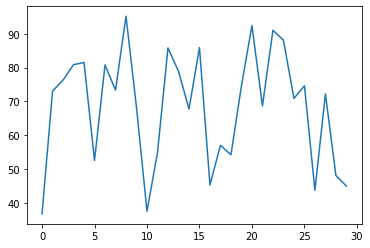

In [6]:
data['Average'].plot()


In [7]:
# I define a dictionary containning the rank of the Grade value 
Rank_dic = {'A+':[96,100],'A':[90,95],'A-':[86, 89], 'B+':[80, 85],'B':[76, 79],\
           'B-':[70, 75], 'C+':[66, 69], 'C':[60, 65],'D':[56, 59],'F':[0, 55]}
def rank(r):
    "this function return the corresponding \
    rank of the grade value"
    for _, M in enumerate(Rank_dic):                # this select the key value in Rank_dic(ie. A+)
        if Rank_dic[M][0] <= r <= Rank_dic[M][1]:   # check if the value in in the range 
            return M                                # output if found or continue 
# I use lambda to iterate over the pandas row 
data['Rank'] = data.apply(lambda row: rank(row['Average']), axis=1)
# now i check the result
data.head()


,First Name,Last Name,English,Maths,Science,German,Sports,Final Grade,Average,Standart Deviation,Rank
0,Robyn,Hobgood,60.95,24.77,20.60,69.32,8.36,184.00,36.800,23.903001,F
1,Eddy,Swearngin,100.00,12.99,100.00,52.24,100.00,365.23,73.046,35.268023,B-
2,Leoma,Bridgman,83.37,100.00,78.69,100.00,19.50,381.56,76.312,29.682710,B
3,Arnetta,Peart,87.75,100.00,86.93,87.90,41.73,404.31,80.862,20.156265,B+
4,Maryland,Colby,100.00,100.00,100.00,18.87,88.72,407.59,81.518,31.627183,B+


#### – Plot the histogram of the final grades.

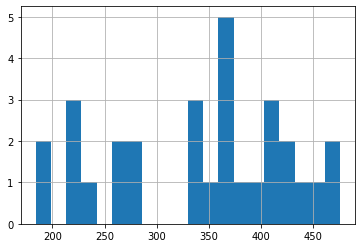

In [8]:
data['Final Grade'].hist(bins=20)

## Task2 description - <font color= red> Word Count Program</font>:  
- In this task your are required to use the provided textfile and write a program that will count the number of occurances of unique words.The program should ignore words like $\{’the’, ’a’,’an’,’be’\}$ Finally you are required to generate the histogram of the top 10 most occuringwords. File link : https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/README.md 

In [13]:
from collections import defaultdict, Counter
import numpy as np
import string
from urllib import request, error, parse
import re
import matplotlib.pyplot as plt 
import time
%matplotlib inline 

In [14]:
def word_count(url, delimit='\n',stopword={'that','the'}):
    """
                Crawle a simple html content
    delimit: string containing all the delimiter, which will
             be passe to regular expession re
    stopword: stop word in the english language
    """
    response = request.urlopen(url)
    read = response.read()
    read = read.decode("utf-8").lower() # transforme the binary into lower string 
    result = defaultdict(int)   
    ###########creating a delimiter with regex
    regexPattern = '|'.join(map(re.escape, delimit)) # aggregate 
    #translate all puntuation into empty string
    punc = string.punctuation #+ string.digits
    table = str.maketrans('','',punc)
    words = [wd for wd in read.split(' ') if len(wd)>2]
    
    for worde in removeStopword(words,regexPattern, stopword):
        word = worde.translate(table)        #replacing the puntiation with ''
        if word.endswith('s'):               #remove s at the end of plural words 
            word = word[:-1]                 #slice the word without s 
        if len(word)>2:                      # adding only word that are more than 2 sylabus 
            result[word] +=1                 # increment if exist else create with 
                                             #count =1 
    return result 

def removeStopword(wordlist,regexPattern, stopwordlist={'that','the'}):
    "This generator clean word from metadata and ditigs"
    for w_is in wordlist:
        #applying the regular expresseion to split long word separate 
        #by metadata and puntuation 
        for w_i in [wd for wd in re.split(regexPattern, w_is) if len(wd)>2]:
            if w_i not in stopwordlist and not w_i.isdigit(): 
                yield w_i
                
def mos_common(dic, how_many=10):
    "Similar to Counter.most_common, this Return the most common word"
    sorted_word = sorted(dic.items(), key=lambda wd: wd[1],\
                         reverse=True)[:how_many]
    return sorted_word

In [15]:
######################################################################### 
###########################DEFINING STOPWORD ############################
stopwords = {'a', 'about', 'above', 'after', 'again', 'against', 'all', \
             'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at',\
             'be', 'because', 'been', 'before', 'being', 'below', \
             'between', 'both', 'but', 'by','can', "can't", 'cannot',\
             'could', "couldn't", 'did', "didn't", 'do','does', "doesn't",\
             'doing', "don't", 'down', 'during','each', 'few', 'for', \
             'from', 'further','had', "hadn't", 'has', "hasn't", 'have',\
             "haven't", 'having', 'he',"he'd", "he'll", "he's", 'her', \
             'here', "here's",'hers', 'herself', 'him', 'himself', 'his',\
             'how', "how's",'i', "i'd", "i'll", "i'm", "i've", 'if', 'in',\
             'into', 'is', "isn't",'it', "it's", 'its', 'itself',"let's", \
             'me', 'more', 'most', "mustn't", 'my', 'myself','no', 'nor',\
             'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other','ought', \
             'our', 'ours' 'ourselves', 'out', 'over', 'own','same', "shan't",\
             'she', "she'd", "she'll", "she's", 'should', "shouldn't", \
             'so', 'some', 'such','than', 'that',"that's", 'the', 'their', \
             'theirs', 'them', 'themselves', 'then', 'there', "there's", \
             'these', 'they', "they'd","they'll", "they're", "they've", 'this',\
             'those', 'through', 'to', 'too','under', 'until', 'up', 'very',\
             'was', "wasn't", 'we', "we'd", "we'll", "we're", "we've", 'were', \
             "weren't",'what', "what's", 'when', "when's", 'where',"where's", \
             'which', 'while', 'who', "who's", 'whom', 'why', "why's",\
             'will', 'with', "won't", 'would', "wouldn't",'you', "you'd",\
             "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves'}
               

In [16]:
############### DEFINING THE DELIMITER FOR REGEX#################
url = "https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/README.md"
deli = "[","]","%","#","/","//","(",")","!","...", "|","\n",\
"\\","=","_","&",",","`","-",".","<",">"
word_count = word_count(url,deli,stopwords)

***Genereating the most common word***

In [17]:
most_10 = mos_common(word_count, how_many=10)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

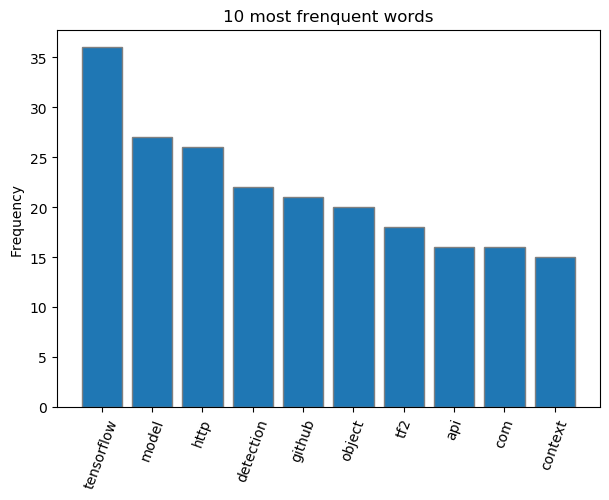

In [18]:
word , values = zip(*most_10)
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.bar(word, values, edgecolor='gray')
plt.title("10 most frenquent words")
plt.ylabel('Frequency')
plt.xticks(rotation=70)

In [19]:
most_20 = mos_common(word_count, how_many=20)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

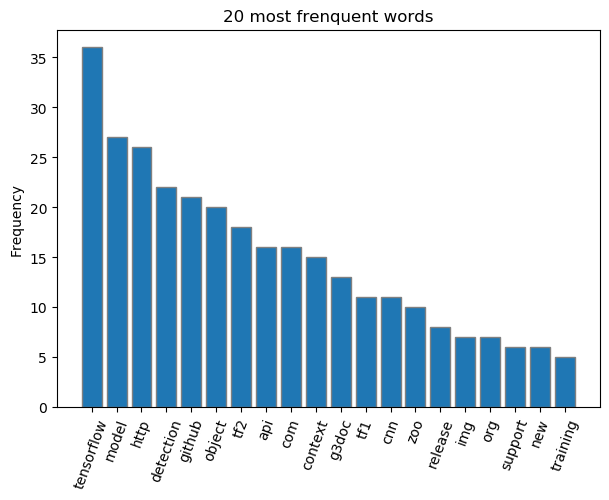

In [20]:
word , values = zip(*most_20)
plt.bar(word, values, edgecolor='gray')
plt.title("20 most frenquent words")
plt.ylabel('Frequency')
plt.xticks(rotation=70)             # displaye label in the x-axis with 70 degree 

## Matrix Multiplication: 
### Using numpy you are required to use numpy for operation on matrices.  Create a matrix A of dimensions $n×m$, where $n = 100$ and $m = 20$.  Initialize Matrix A. Create a vector v of dimensionm×1.  Initialize thematrix with random values and vector with normal distribution using $\mu= 5 $ and $\sigma= 0.01$. 
### Perform following operation on them
1. #### Iterative multiply (element-wise) each row of matrix A with vector v and sumthe result of each iteration in another vector c
- #### Find the mean and standard deviation of the new vector c
- #### Plot histogram of vector c using 5 bins
- #### NOTE: You are no allowed to use ANY BUILTIN FUNCTIONS FOR CALCULATING THE MATRIX MULTIPLICATION. Implement it yourself.

In [21]:
A = np.random.random(size=(100,20))  
v = np.random.normal(loc=2, scale=0.01, size=(20,))  

In [9]:
from numpy.random import randint, rand # to generate nearly randomize integer and float respectively
from numpy.random import seed          # to set a seed for our rundomize number (this will fix the same randomize array)
from math import sqrt
N , M = 100, 20                        # the size of the matrix 
mu, sig = 5, 0.01                      # the mean and the sigma values 
A = np.array(randint(0,10,size=(N,M)), dtype=float)  # this will create matrix array for 0 to 10 with NxN
s = np.random.normal(mu, sig, 20)      # this will create Matrix array for 0 to 10 with N size


In [22]:
def matrix_vector(M, v):
    """Perform elementwise multiplication
    M: matrix(nxm)
    v: vector(nx1)
    output: C 
    """
    mr,mc = M.shape
    vr,   = v.shape
    assert mc==vr          # checking for dimention matching
    c = np.zeros(mr)       # Initialize the output with zeros
    for i in range(mr):    # go over all rows
        for j in range(vr):# go over all columns
            c[i] += M[i,j]*v[j]
    return c

def mean(x ):
    "Return the mean of a vector"
    return sum(x)/len(x)

def stand_dev(M):
    "this return the standart deviation of a vector"
    M_m  = mean(M)
    return np.sqrt(sum((M-M_m)**2)/len(M))


In [23]:
%time resu = matrix_vector(A,v)

CPU times: user 1.89 ms, sys: 0 ns, total: 1.89 ms
Wall time: 1.89 ms


In [24]:
#uncomment that to compare with numpy mean 
c_mean = mean(resu); print("the mean of vector result",c_mean)
print(np.allclose(resu.mean(),c_mean, rtol=1e-05, atol=1e-08))

the mean of vector result 19.99032268058102
True


In [25]:
#uncomment that to compare with numpy standard deviation
c_std = stand_dev(resu);print("standart deviation:",c_std)
print(np.allclose(resu.std(), c_std, rtol=1e-05, atol=1e-08))

standart deviation: 2.7144645864672547
True


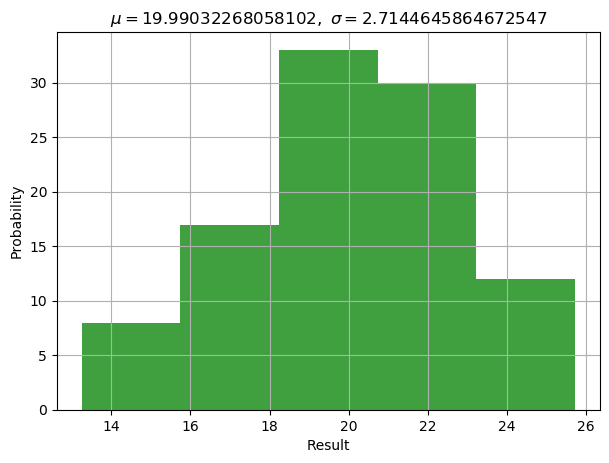

In [26]:
# the histogram of the result
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.hist(resu, 5,  facecolor='green', alpha=0.75)
plt.xlabel('Result')
plt.ylabel('Probability')
plt.title(f"$\mu={c_mean},\ \sigma={c_std}$")
plt.grid(True)

## Linear Regression through exact form
In this exercise you will implement linear regression that was introduced in the introduction Machine Learning Lecture.
- Generate 3 sets of simple data.  i.e.  a matrix A with dimensions 100×2.  Initializeit with normal distribution $\mu= 2 $  and $\sigma = [0.01,0.1,1]$ 
- Implement LEARN-SIMPLE-LINREG algorithm and train it using matrix A to learn values of $\beta_0$and $\beta_1$
- Implement PREDICT-SIMPLE-LINREG and calculate the points for each trainingexample in matrix A.•Plot the training points from matrix A and predicted values in the form of linegraph.
- Comment on the effect thatσhas on the line that is predicted.
- Put $\beta_0$ to zero and rerun the program to generate the predicted line.  Commenton the change you see for the varying values ofσ
- Put $\beta_1$ to zero and rerun the program to generate the predicted line.  Commenton the change you see for the varying values of $\sigma$ 
- In the end use numpy.linalg lstsq to replace step 2 for learning values of $\beta_0$and $\beta_1$

***Generating three matrices dim=$n\times m$ with $\mu=2$ and $\sigma=[0.001,0.1,1]$ respectivelly***

In [27]:
mu, sigma1, sigma2, sigma3 = 2, 0.001, 0.01, 1
N, M = 100, 2
norm_dis = lambda sigma: mu + sigma*np.random.randn(N,M) # clearting the anynous function 
np.random.seed(19680801)
A1 = norm_dis(sigma1)
A2 = norm_dis(sigma2) 
A3 = norm_dis(sigma3) 

### In the slide, the slope and intersept are calculated using the following formulas:
$$\hat{\beta}_1= \frac{\sum_{n=1}^{N}(x_n-\bar{x})(y_n-\bar{y})}{\sum_{n=1}^{N}(x_n-\bar{x})^2}$$
$$\hat{\beta}_0= \bar{y} - \hat{\beta}_1\bar{x}$$
And we predict using:
$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1x$$

In [28]:
def LEARN_SIMPLE_LINREG(x, y):
    
    """this function return b1, b0 the parameters of the 
       the line Y = b1 * X + b0 """

    if x.shape != y.shape:
        raise RuntimeError('number of points do not match')
        
    x_m, y_m = x.mean(),y.mean() # we determine the mean of the the vector
    
    b1 = sum((x-x_m)*(y-y_m))/sum((x-x_m)**2)  # I use the formula from the slide 
    b0 = y_m - b1*x_m
    return b1, b0

def PREDICT_SIMPLE_LINREG(b1, b0, val):
    return b1*val + b0

In [29]:
def scatter_plot(Datas,sigmas,coefs):
    fig, ax = plt.subplots(1,3,figsize=(15, 5))
    plt.style.use('fivethirtyeight')
    k_colore = ['lightgreen','orange','lightblue']
    marker = ['s','o','v']
    for num, Data in enumerate(Datas):
        ax[num].scatter(Data[:,0],Data[:,1],s=50, c=k_colore[num],\
                    marker=marker[num], edgecolor='black',label=f"with $\sigma={sigmas[num]}$")
        ax[num].plot(Data[:,0], PREDICT_SIMPLE_LINREG(coefs[num][0],coefs[num][1],Data[:,0]), color='red', linewidth=2)
        
    
        ax[num].legend(scatterpoints=1)
        ax[num].grid()


In [30]:
train = lambda A : LEARN_SIMPLE_LINREG(A[:,0],A[:,1])

In [31]:
coefs = list(map(train, [A1, A2,A3]))

In [32]:
sig = [0.001, 0.01, 1]
for num, coef in enumerate(coefs):
    print(f"Data with sigma = {sig[num]}: β1 ={coef[0]}and β0 ={coef[1]}")

Data with sigma = 0.001: β1 =0.05287841749534214and β0 =1.894244611961965
Data with sigma = 0.01: β1 =-0.09946403325143782and β0 =2.1996350011826964
Data with sigma = 1: β1 =-0.13565680943685118and β0 =2.4593979649218185


##### ploting the data and their respective prediction

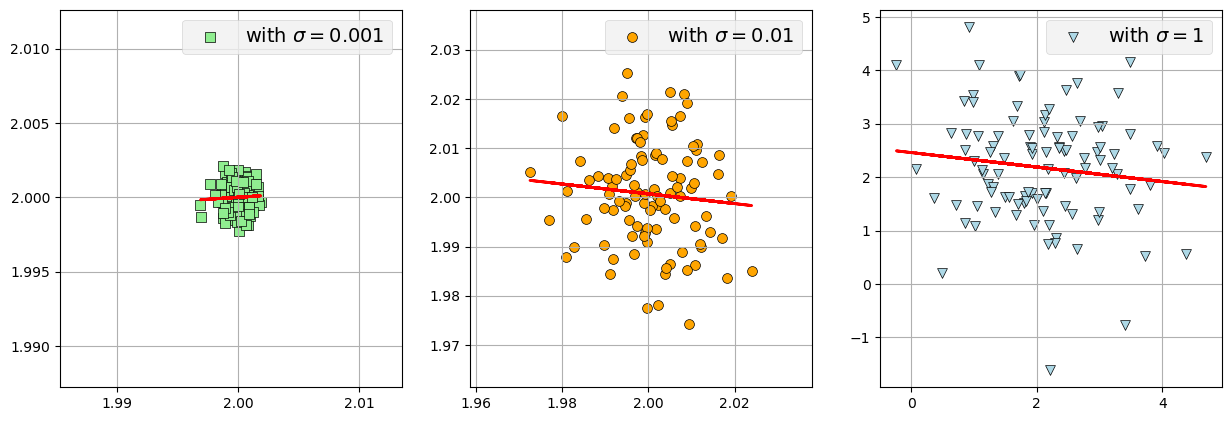

In [33]:
scatter_plot([A1, A2,A3],sig,coefs)

***Commenting on the effect of $\sigma$***
### AS we can see the $\sigma$ has no effect on the predicted value
the Only noticeable difference is the representation of the variance

In [34]:
coefs

[(0.05287841749534214, 1.894244611961965),
 (-0.09946403325143782, 2.1996350011826964),
 (-0.13565680943685118, 2.4593979649218185)]

In [35]:
no_beta0 = []
for coef in coefs:
    no_beta0.append((coef[0],0))
no_beta0

[(0.05287841749534214, 0),
 (-0.09946403325143782, 0),
 (-0.13565680943685118, 0)]

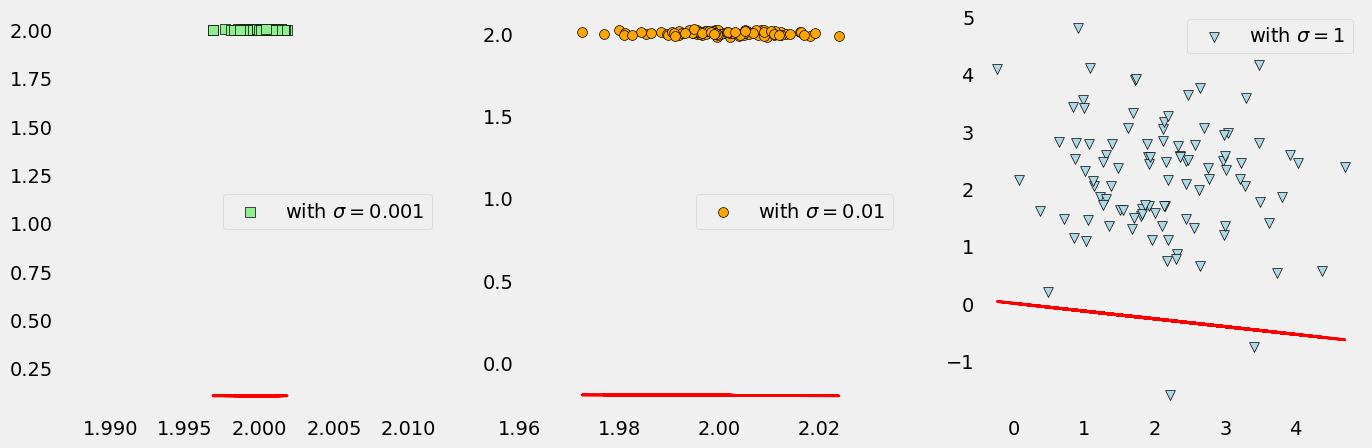

In [36]:
scatter_plot([A1, A2,A3],sig,no_beta0)

### We notice that this force the intersept to be zeros. The starting point of the prediction. With small $\sigma$ we can't the effect of the slope, but larger $\sigma$ the slope is noticeable. The effect of the $\mu$ make it impossible of line to reach the data points with smaller $\sigma$

In [37]:
no_beta1 = []
for coef in coefs:
    no_beta1.append((0,coef[1]))
no_beta1

[(0, 1.894244611961965), (0, 2.1996350011826964), (0, 2.4593979649218185)]

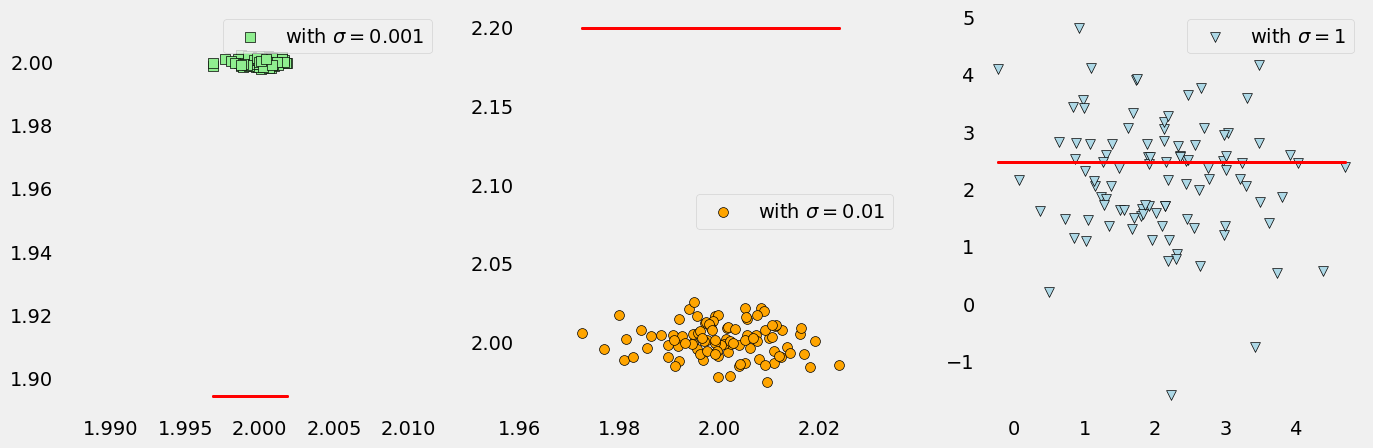

In [38]:
scatter_plot([A1, A2,A3],sig,no_beta1)

### This produce a straight line close to 1.9 . With small $\sigma$ the data points are squize around the mean $\mu$, with higher $\sigma$, the straight line going through the data points visible

## Using  numpy.linalg to calculate the coefiscients 

In [40]:
x = A1[:,0]
y = A1[:,1]
x = np.column_stack((x,np.ones(len(x))))

In [41]:
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html
m, c = np.linalg.lstsq(x, y, rcond=None)[0]
print(f"β1 ={m}  and β0 ={c}")

β1 =0.052878417495379436  and β0 =1.8942446119618899
